# Decision Trees Basics

## Learning Objectives
By the end of this notebook, you will be able to:
- Understand how decision trees make predictions
- Explain the concept of splits, nodes, and leaves
- Understand impurity measures (Gini index and Entropy)
- Visualize decision trees
- Tune hyperparameters to control overfitting
- Apply decision trees to real datasets

## Introduction

**Decision Trees** are one of the most intuitive machine learning algorithms. They work like a flowchart:
- Start at the root (top)
- Ask a series of yes/no questions
- Follow the path based on answers
- Arrive at a prediction (leaf)

Think of it like playing "20 Questions" to guess something!

## Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. A Simple Example: Should You Play Outside?

Let's start with a simple decision tree example to understand the concept.

In [2]:
# Create a simple dataset: Should you play outside?
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 
                'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 
                   'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, 
              False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 
             'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("Simple Weather Dataset:")
print(df.head(10))
print(f"\nTotal samples: {len(df)}")
print(f"Play outside: {(df['Play'] == 'Yes').sum()} times")
print(f"Stay inside: {(df['Play'] == 'No').sum()} times")

Simple Weather Dataset:
    Outlook Temperature Humidity  Windy Play
0     Sunny         Hot     High  False   No
1     Sunny         Hot     High   True   No
2  Overcast         Hot     High  False  Yes
3     Rainy        Mild     High  False  Yes
4     Rainy        Cool   Normal  False  Yes
5     Rainy        Cool   Normal   True   No
6  Overcast        Cool   Normal   True  Yes
7     Sunny        Mild     High  False   No
8     Sunny        Cool   Normal  False  Yes
9     Rainy        Mild   Normal  False  Yes

Total samples: 14
Play outside: 9 times
Stay inside: 5 times


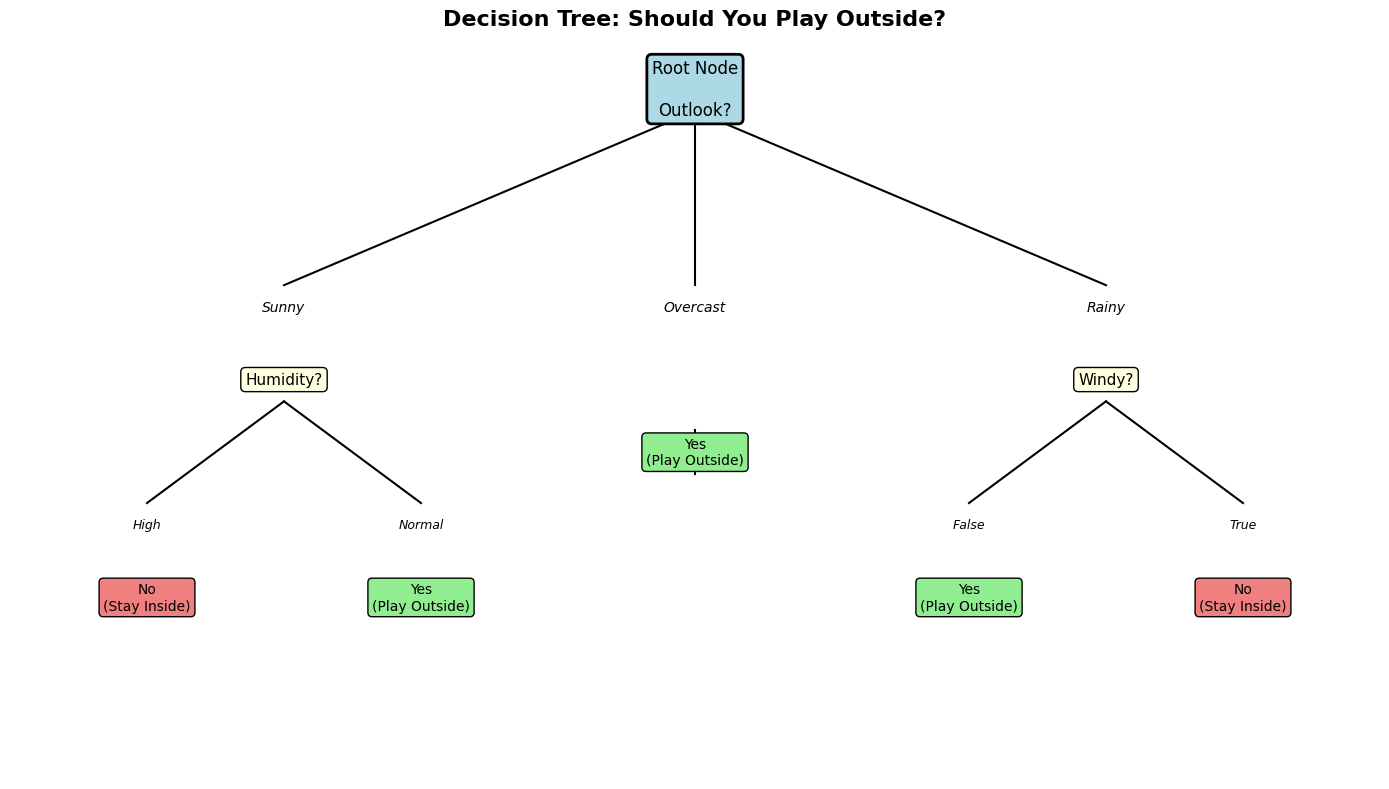


How to read this tree:
1. Start at the top (root node): What's the Outlook?
2. Follow the branch based on the answer
3. Continue until you reach a leaf (green=Yes, red=No)

Example: If it's Sunny and Humidity is High -> Stay Inside (No)


In [3]:
# Visualize how a decision tree would think
fig, ax = plt.subplots(figsize=(14, 8))

# This is a conceptual diagram showing the tree structure
ax.text(0.5, 0.95, 'Root Node\n\nOutlook?', 
        ha='center', va='center', fontsize=12, 
        bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='black', linewidth=2),
        transform=ax.transAxes)

# Sunny branch
ax.text(0.2, 0.65, 'Sunny', ha='center', va='center', fontsize=10, 
        style='italic', transform=ax.transAxes)
ax.text(0.2, 0.55, 'Humidity?', ha='center', va='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black'),
        transform=ax.transAxes)
ax.text(0.1, 0.35, 'High', ha='center', va='center', fontsize=9, style='italic', transform=ax.transAxes)
ax.text(0.1, 0.25, 'No\n(Stay Inside)', ha='center', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightcoral', edgecolor='black'),
        transform=ax.transAxes)
ax.text(0.3, 0.35, 'Normal', ha='center', va='center', fontsize=9, style='italic', transform=ax.transAxes)
ax.text(0.3, 0.25, 'Yes\n(Play Outside)', ha='center', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='black'),
        transform=ax.transAxes)

# Overcast branch
ax.text(0.5, 0.65, 'Overcast', ha='center', va='center', fontsize=10, 
        style='italic', transform=ax.transAxes)
ax.text(0.5, 0.45, 'Yes\n(Play Outside)', ha='center', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='black'),
        transform=ax.transAxes)

# Rainy branch
ax.text(0.8, 0.65, 'Rainy', ha='center', va='center', fontsize=10, 
        style='italic', transform=ax.transAxes)
ax.text(0.8, 0.55, 'Windy?', ha='center', va='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='black'),
        transform=ax.transAxes)
ax.text(0.7, 0.35, 'False', ha='center', va='center', fontsize=9, style='italic', transform=ax.transAxes)
ax.text(0.7, 0.25, 'Yes\n(Play Outside)', ha='center', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightgreen', edgecolor='black'),
        transform=ax.transAxes)
ax.text(0.9, 0.35, 'True', ha='center', va='center', fontsize=9, style='italic', transform=ax.transAxes)
ax.text(0.9, 0.25, 'No\n(Stay Inside)', ha='center', va='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='lightcoral', edgecolor='black'),
        transform=ax.transAxes)

# Draw connecting lines
ax.plot([0.5, 0.2], [0.92, 0.68], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.5, 0.5], [0.92, 0.68], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.5, 0.8], [0.92, 0.68], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.2, 0.1], [0.52, 0.38], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.2, 0.3], [0.52, 0.38], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.5, 0.5], [0.42, 0.48], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.8, 0.7], [0.52, 0.38], 'k-', linewidth=1.5, transform=ax.transAxes)
ax.plot([0.8, 0.9], [0.52, 0.38], 'k-', linewidth=1.5, transform=ax.transAxes)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Decision Tree: Should You Play Outside?', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nHow to read this tree:")
print("1. Start at the top (root node): What's the Outlook?")
print("2. Follow the branch based on the answer")
print("3. Continue until you reach a leaf (green=Yes, red=No)")
print("\nExample: If it's Sunny and Humidity is High -> Stay Inside (No)")

### Key Insight: Tree Terminology

- **Root Node**: The top node (first question)
- **Internal Nodes**: Nodes with questions (decision points)
- **Leaf Nodes**: End nodes with predictions
- **Branches**: Connections between nodes (answers to questions)
- **Depth**: Number of questions from root to leaf

## 2. Decision Trees on Real Data: Iris Dataset

Let's apply decision trees to the classic Iris flower dataset.

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7  setosa  
8  setos

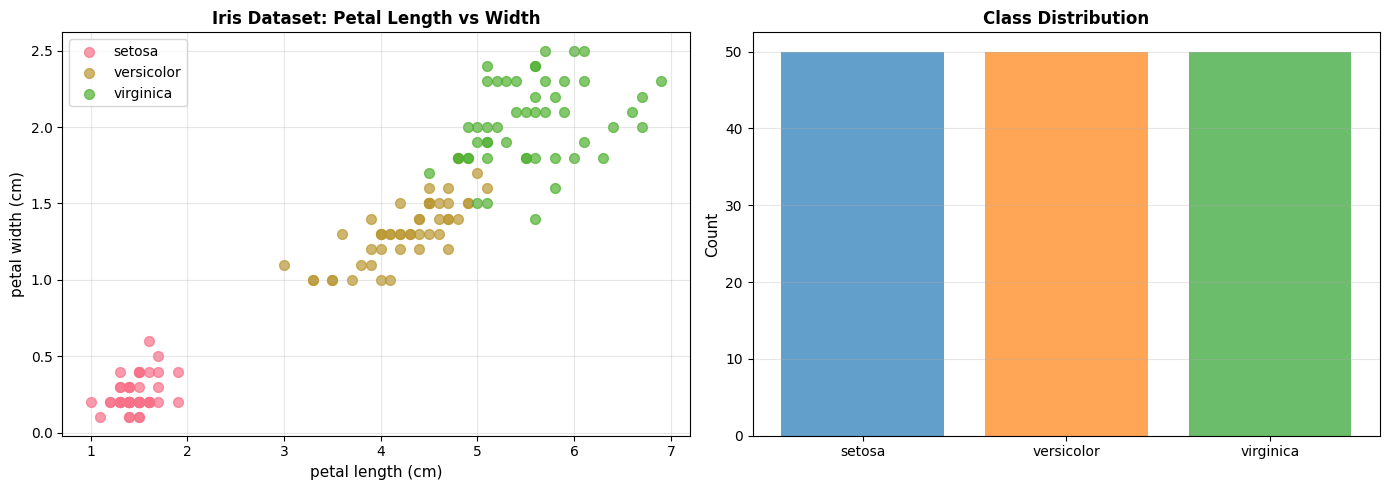

In [4]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a DataFrame for easier viewing
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['species'] = [iris.target_names[i] for i in y]

print("Iris Dataset:")
print(df_iris.head(10))
print(f"\nDataset shape: {X.shape}")
print(f"Features: {iris.feature_names}")
print(f"Classes: {iris.target_names}")

# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
for i, species in enumerate(iris.target_names):
    mask = y == i
    axes[0].scatter(X[mask, 2], X[mask, 3], label=species, s=50, alpha=0.7)
axes[0].set_xlabel(iris.feature_names[2], fontsize=11)
axes[0].set_ylabel(iris.feature_names[3], fontsize=11)
axes[0].set_title('Iris Dataset: Petal Length vs Width', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Class distribution
class_counts = pd.Series(y).value_counts().sort_index()
axes[1].bar(iris.target_names, class_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Class Distribution', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [5]:
# Train a simple decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTest Accuracy: {accuracy:.3f}")
print(f"Correct predictions: {(y_pred == y_test).sum()} / {len(y_test)}")

Training set size: 105
Test set size: 45

Test Accuracy: 1.000
Correct predictions: 45 / 45


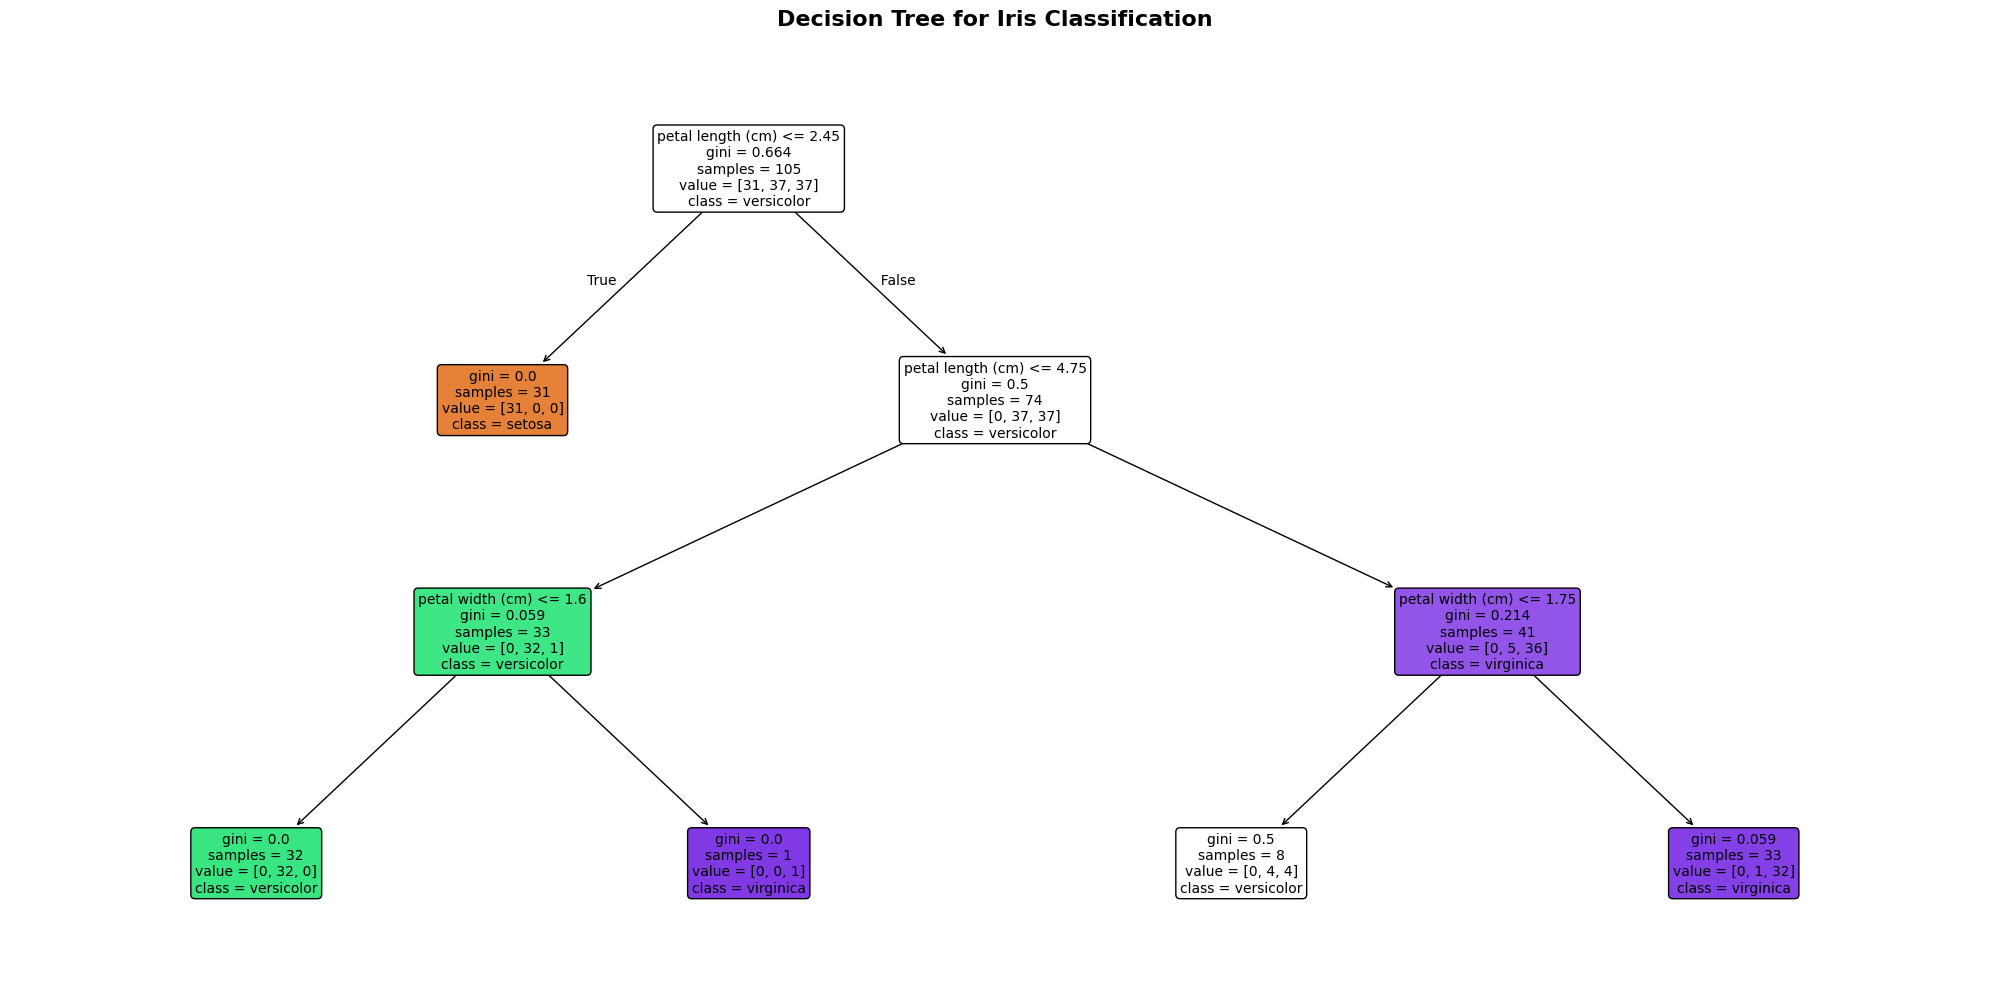


How to read this tree:
- Each box is a node
- Top line: The question (e.g., 'petal width <= 0.8')
- 'gini': Impurity measure (lower is better)
- 'samples': Number of training samples at this node
- 'value': [setosa, versicolor, virginica] counts
- 'class': Majority class at this node
- Color: Darker = more pure (more samples of one class)


In [6]:
# Visualize the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for Iris Classification', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nHow to read this tree:")
print("- Each box is a node")
print("- Top line: The question (e.g., 'petal width <= 0.8')")
print("- 'gini': Impurity measure (lower is better)")
print("- 'samples': Number of training samples at this node")
print("- 'value': [setosa, versicolor, virginica] counts")
print("- 'class': Majority class at this node")
print("- Color: Darker = more pure (more samples of one class)")

## 3. How Trees Learn: Splitting Criteria

Decision trees learn by finding the best questions to ask. But what makes a question "good"?

**Goal**: Create pure groups (all samples in a node belong to the same class)

We measure impurity using:
1. **Gini Index** (default in scikit-learn)
2. **Entropy** (Information Gain)

Lower impurity = better split

### 3.1 Gini Index

Gini Index measures the probability of incorrectly classifying a random sample.

**Formula**: $Gini = 1 - \sum_{i=1}^{C} p_i^2$

where $p_i$ is the proportion of class $i$

**Interpretation**:
- Gini = 0: Perfect purity (all samples same class)
- Gini = 0.5: Maximum impurity (equal mix of 2 classes)
- Gini closer to 0 = better

Gini Index Examples:

Pure (All Class A)       : [10, 0, 0] -> Gini = 0.000
Pure (All Class B)       : [0, 10, 0] -> Gini = 0.000
Mixed (Equal)            : [5, 5, 0] -> Gini = 0.500
Mixed (3 classes)        : [3, 3, 4] -> Gini = 0.660
Mostly Pure              : [9, 1, 0] -> Gini = 0.180
Completely Mixed         : [3, 3, 3] -> Gini = 0.667


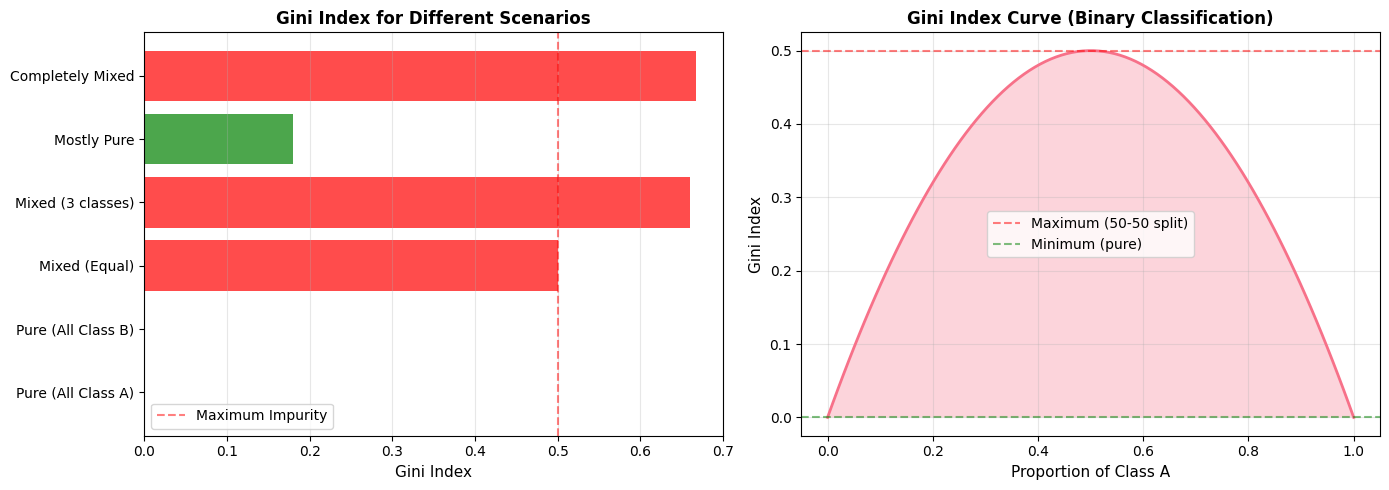


Key Insight:
- Lower Gini = more pure = better split
- Decision trees try to minimize Gini at each split


In [7]:
# Calculate Gini index for different scenarios
def gini_index(class_counts):
    """Calculate Gini index given class counts"""
    total = sum(class_counts)
    if total == 0:
        return 0
    probabilities = [count / total for count in class_counts]
    return 1 - sum([p**2 for p in probabilities])

# Example scenarios
scenarios = {
    'Pure (All Class A)': [10, 0, 0],
    'Pure (All Class B)': [0, 10, 0],
    'Mixed (Equal)': [5, 5, 0],
    'Mixed (3 classes)': [3, 3, 4],
    'Mostly Pure': [9, 1, 0],
    'Completely Mixed': [3, 3, 3]
}

print("Gini Index Examples:\n")
gini_values = []
scenario_names = []
for name, counts in scenarios.items():
    gini = gini_index(counts)
    gini_values.append(gini)
    scenario_names.append(name)
    print(f"{name:25s}: {counts} -> Gini = {gini:.3f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of Gini values
colors = ['green' if g < 0.3 else 'orange' if g < 0.5 else 'red' for g in gini_values]
axes[0].barh(scenario_names, gini_values, color=colors, alpha=0.7)
axes[0].set_xlabel('Gini Index', fontsize=11)
axes[0].set_title('Gini Index for Different Scenarios', fontsize=12, fontweight='bold')
axes[0].axvline(0.5, color='red', linestyle='--', alpha=0.5, label='Maximum Impurity')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Gini curve for binary classification
p = np.linspace(0, 1, 100)
gini_curve = 2 * p * (1 - p)
axes[1].plot(p, gini_curve, linewidth=2)
axes[1].fill_between(p, gini_curve, alpha=0.3)
axes[1].set_xlabel('Proportion of Class A', fontsize=11)
axes[1].set_ylabel('Gini Index', fontsize=11)
axes[1].set_title('Gini Index Curve (Binary Classification)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(0.5, color='red', linestyle='--', alpha=0.5, label='Maximum (50-50 split)')
axes[1].axhline(0, color='green', linestyle='--', alpha=0.5, label='Minimum (pure)')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("- Lower Gini = more pure = better split")
print("- Decision trees try to minimize Gini at each split")

### 3.2 Entropy and Information Gain

**Entropy** measures the amount of "disorder" or "uncertainty"

**Formula**: $Entropy = -\sum_{i=1}^{C} p_i \log_2(p_i)$

**Information Gain** = How much entropy is reduced after a split

**Interpretation**:
- Entropy = 0: Perfect purity
- Entropy = 1: Maximum disorder (2 classes)
- Higher information gain = better split

Entropy Examples:

Pure (All Class A)       : [10, 0, 0] -> Entropy = -0.000, Gini = 0.000
Pure (All Class B)       : [0, 10, 0] -> Entropy = -0.000, Gini = 0.000
Mixed (Equal)            : [5, 5, 0] -> Entropy = 1.000, Gini = 0.500
Mixed (3 classes)        : [3, 3, 4] -> Entropy = 1.571, Gini = 0.660
Mostly Pure              : [9, 1, 0] -> Entropy = 0.469, Gini = 0.180
Completely Mixed         : [3, 3, 3] -> Entropy = 1.585, Gini = 0.667


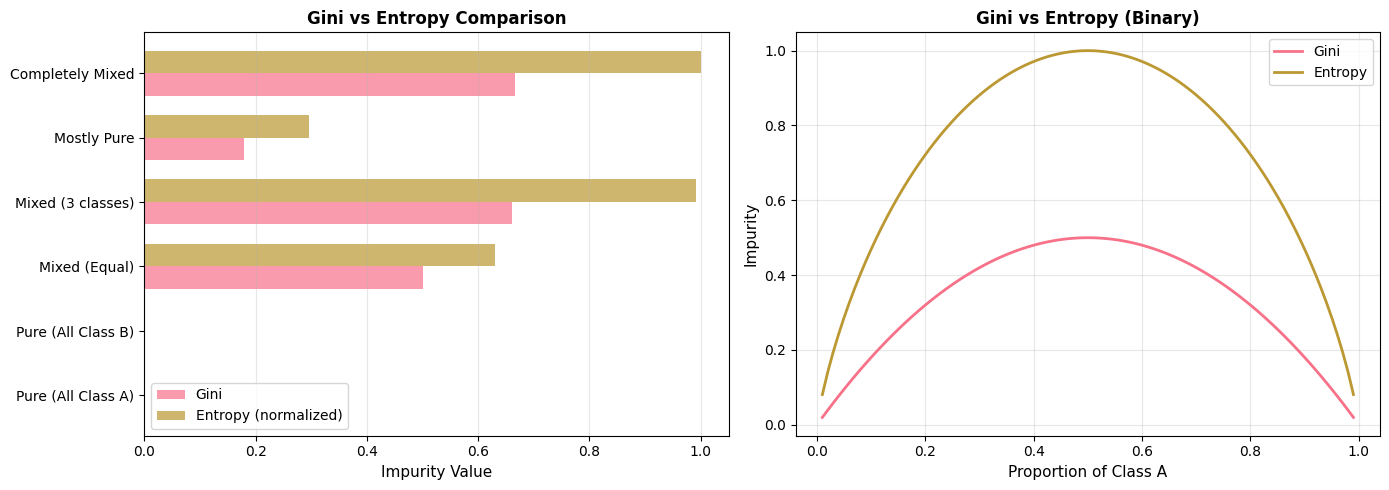


Key Insight:
- Gini and Entropy are similar in practice
- Gini is slightly faster to compute (no logarithm)
- Both measure impurity: lower is better


In [8]:
# Calculate Entropy
def entropy(class_counts):
    """Calculate entropy given class counts"""
    total = sum(class_counts)
    if total == 0:
        return 0
    probabilities = [count / total for count in class_counts if count > 0]
    return -sum([p * np.log2(p) for p in probabilities])

print("Entropy Examples:\n")
entropy_values = []
for name, counts in scenarios.items():
    ent = entropy(counts)
    gini = gini_index(counts)
    entropy_values.append(ent)
    print(f"{name:25s}: {counts} -> Entropy = {ent:.3f}, Gini = {gini:.3f}")

# Compare Gini vs Entropy
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Side-by-side comparison
x = np.arange(len(scenario_names))
width = 0.35

# Normalize entropy to [0, 1] for comparison
max_entropy = np.log2(3)  # Maximum entropy for 3 classes
entropy_normalized = [e / max_entropy for e in entropy_values]

axes[0].barh(x - width/2, gini_values, width, label='Gini', alpha=0.7)
axes[0].barh(x + width/2, entropy_normalized, width, label='Entropy (normalized)', alpha=0.7)
axes[0].set_yticks(x)
axes[0].set_yticklabels(scenario_names)
axes[0].set_xlabel('Impurity Value', fontsize=11)
axes[0].set_title('Gini vs Entropy Comparison', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Both curves for binary classification
p = np.linspace(0.01, 0.99, 100)
gini_curve = 2 * p * (1 - p)
entropy_curve = -(p * np.log2(p) + (1-p) * np.log2(1-p))

axes[1].plot(p, gini_curve, linewidth=2, label='Gini')
axes[1].plot(p, entropy_curve, linewidth=2, label='Entropy')
axes[1].set_xlabel('Proportion of Class A', fontsize=11)
axes[1].set_ylabel('Impurity', fontsize=11)
axes[1].set_title('Gini vs Entropy (Binary)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("- Gini and Entropy are similar in practice")
print("- Gini is slightly faster to compute (no logarithm)")
print("- Both measure impurity: lower is better")

## 4. Hyperparameters: Controlling Tree Growth

Decision trees can easily overfit by growing too deep. We control this with hyperparameters.

### 4.1 max_depth: Maximum Depth of the Tree

**max_depth** limits how many questions the tree can ask in sequence.

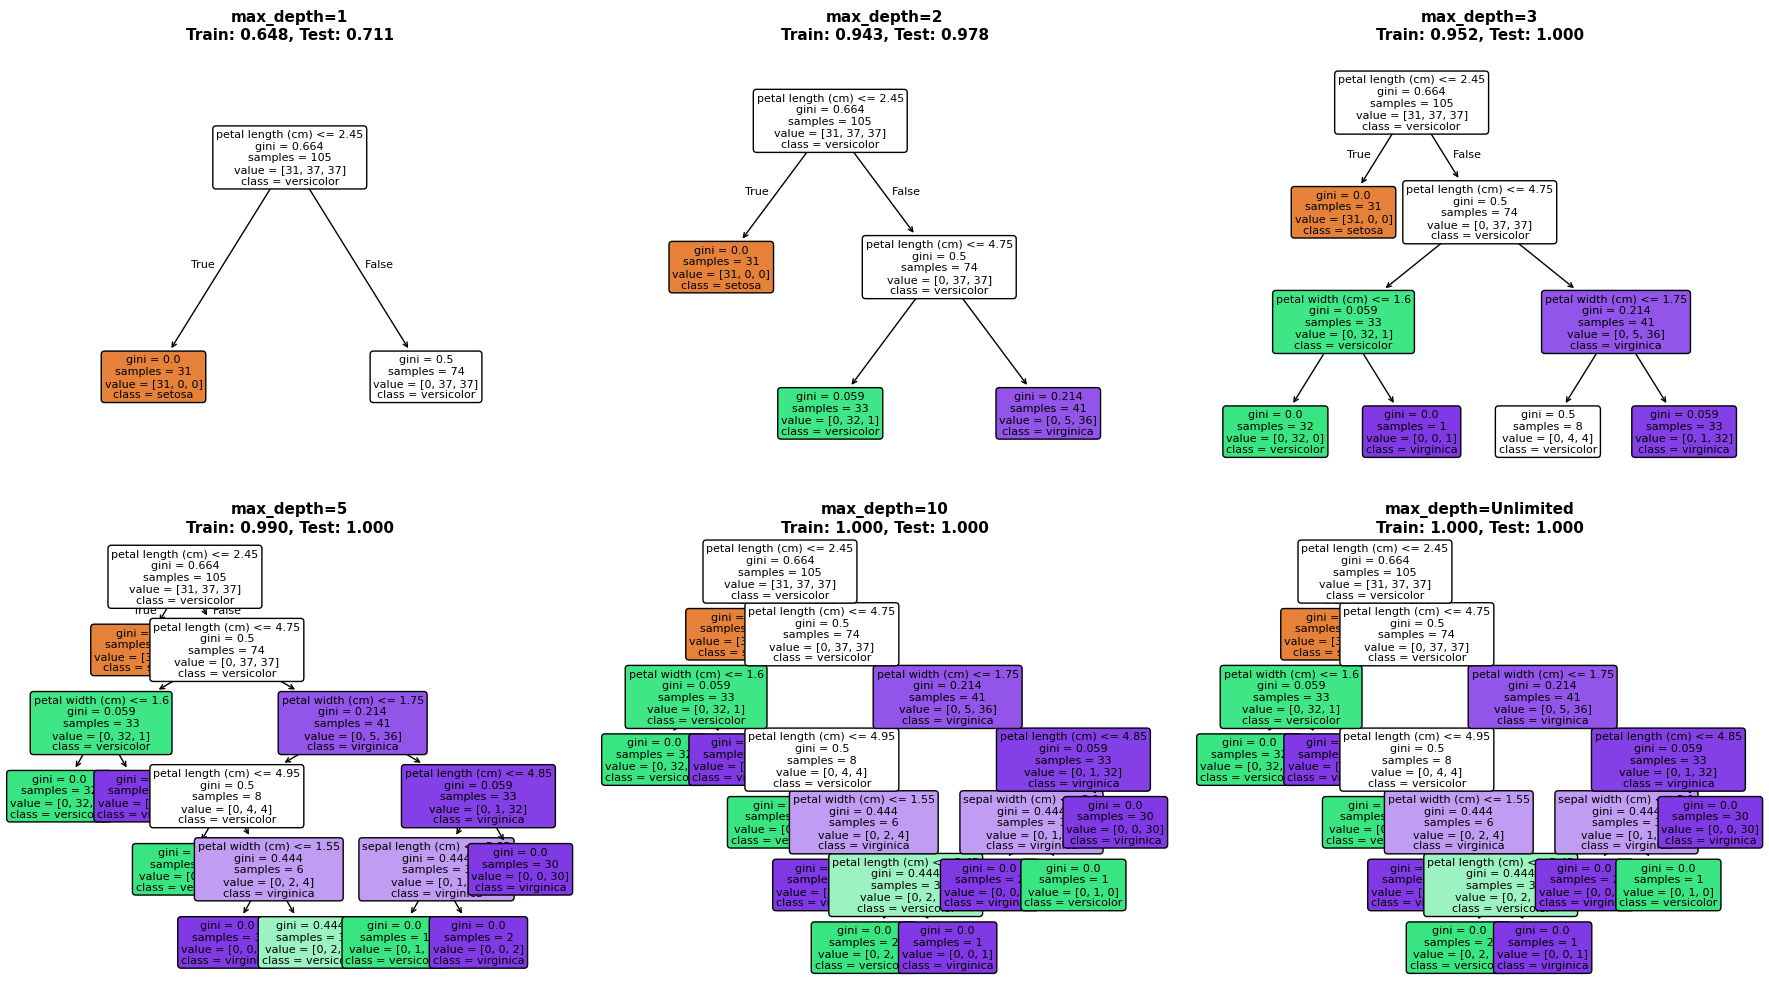


Performance Summary:

max_depth | Train Acc | Test Acc | Notes
------------------------------------------------------------
1         |     0.648 |    0.711 | 
2         |     0.943 |    0.978 | Good balance
3         |     0.952 |    1.000 | Good balance
5         |     0.990 |    1.000 | Good balance
10        |     1.000 |    1.000 | Good balance
None      |     1.000 |    1.000 | Good balance


In [9]:
# Compare different max_depth values
depths = [1, 2, 3, 5, 10, None]  # None = no limit

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

train_scores = []
test_scores = []

for idx, depth in enumerate(depths):
    # Train tree with specific depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Calculate scores
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    # Plot tree
    plot_tree(tree, 
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              filled=True,
              rounded=True,
              fontsize=8,
              ax=axes[idx])
    
    depth_str = str(depth) if depth is not None else 'Unlimited'
    axes[idx].set_title(f'max_depth={depth_str}\nTrain: {train_score:.3f}, Test: {test_score:.3f}',
                       fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPerformance Summary:")
print("\nmax_depth | Train Acc | Test Acc | Notes")
print("-" * 60)
for depth, train, test in zip(depths, train_scores, test_scores):
    depth_str = str(depth) if depth is not None else 'None'
    notes = ""
    if train > 0.99 and test < train - 0.05:
        notes = "Overfitting!"
    elif test > 0.95:
        notes = "Good balance"
    print(f"{depth_str:9s} | {train:9.3f} | {test:8.3f} | {notes}")

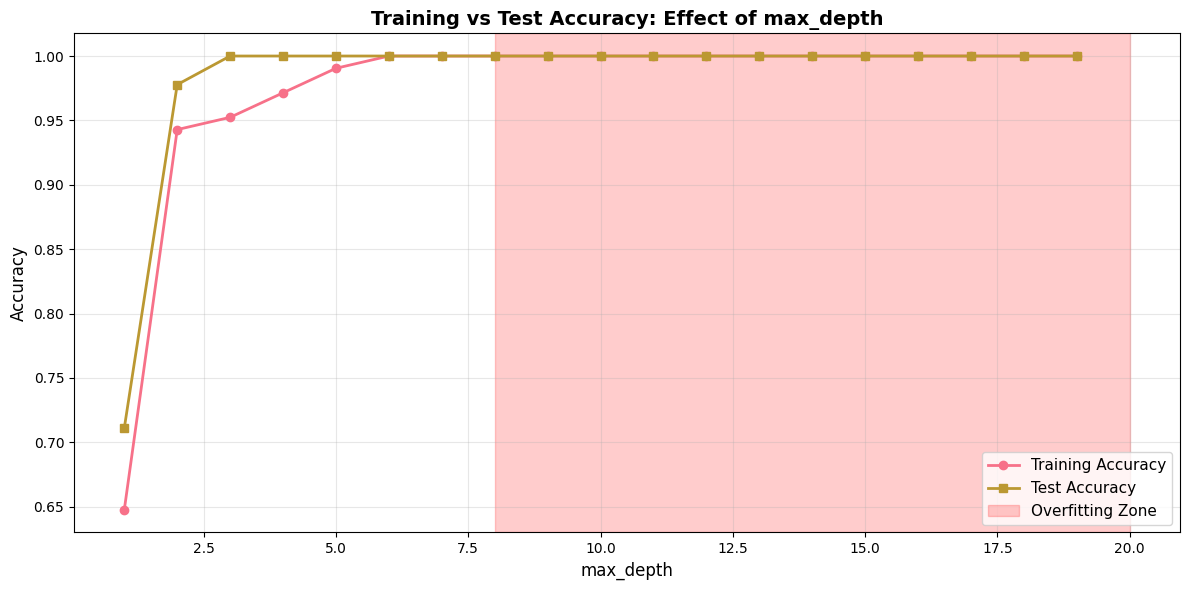


Key Insight:
- Shallow trees (depth 1-3): Underfitting (too simple)
- Medium trees (depth 3-6): Good balance
- Deep trees (depth > 8): Overfitting (memorizing training data)


In [10]:
# Visualize overfitting
depth_range = range(1, 20)
train_scores = []
test_scores = []

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(depth_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(depth_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('max_depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Test Accuracy: Effect of max_depth', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Highlight overfitting region
plt.axvspan(8, 20, alpha=0.2, color='red', label='Overfitting Zone')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("- Shallow trees (depth 1-3): Underfitting (too simple)")
print("- Medium trees (depth 3-6): Good balance")
print("- Deep trees (depth > 8): Overfitting (memorizing training data)")

### 4.2 min_samples_split: Minimum Samples to Split

**min_samples_split**: Minimum number of samples required to split a node.

- Higher values = simpler trees (stops splitting earlier)
- Lower values = more complex trees

In [ ]:
# Compare different min_samples_split values
min_samples_values = [2, 5, 10, 20, 30]

results = []
for min_samples in min_samples_values:
    tree = DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
    tree.fit(X_train, y_train)
    
    results.append({
        'min_samples_split': min_samples,
        'train_acc': tree.score(X_train, y_train),
        'test_acc': tree.score(X_test, y_test),
        'n_leaves': tree.get_n_leaves(),
        'depth': tree.get_depth()
    })

results_df = pd.DataFrame(results)
print("\nEffect of min_samples_split:")
print(results_df.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(results_df['min_samples_split'], results_df['train_acc'], 
            'o-', label='Train', linewidth=2)
axes[0].plot(results_df['min_samples_split'], results_df['test_acc'], 
            's-', label='Test', linewidth=2)
axes[0].set_xlabel('min_samples_split', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Accuracy vs min_samples_split', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tree complexity
ax2 = axes[1]
ax2.plot(results_df['min_samples_split'], results_df['n_leaves'], 
        'o-', color='green', label='Number of Leaves', linewidth=2)
ax2.set_xlabel('min_samples_split', fontsize=11)
ax2.set_ylabel('Number of Leaves', color='green', fontsize=11)
ax2.tick_params(axis='y', labelcolor='green')

ax3 = ax2.twinx()
ax3.plot(results_df['min_samples_split'], results_df['depth'], 
        's-', color='blue', label='Tree Depth', linewidth=2)
ax3.set_ylabel('Tree Depth', color='blue', fontsize=11)
ax3.tick_params(axis='y', labelcolor='blue')

axes[1].set_title('Tree Complexity vs min_samples_split', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("- Higher min_samples_split = simpler trees (fewer leaves)")
print("- Helps prevent overfitting by avoiding splits on small groups")

### 4.3 Other Important Hyperparameters

**min_samples_leaf**: Minimum samples in a leaf node
- Must have at least this many samples in leaf
- Higher = simpler tree

**max_features**: Number of features to consider
- 'auto' or 'sqrt': sqrt(n_features)
- 'log2': log2(n_features)
- Useful for random forests (coming in next notebook!)

**criterion**: Splitting criterion
- 'gini': Gini impurity (default)
- 'entropy': Information gain

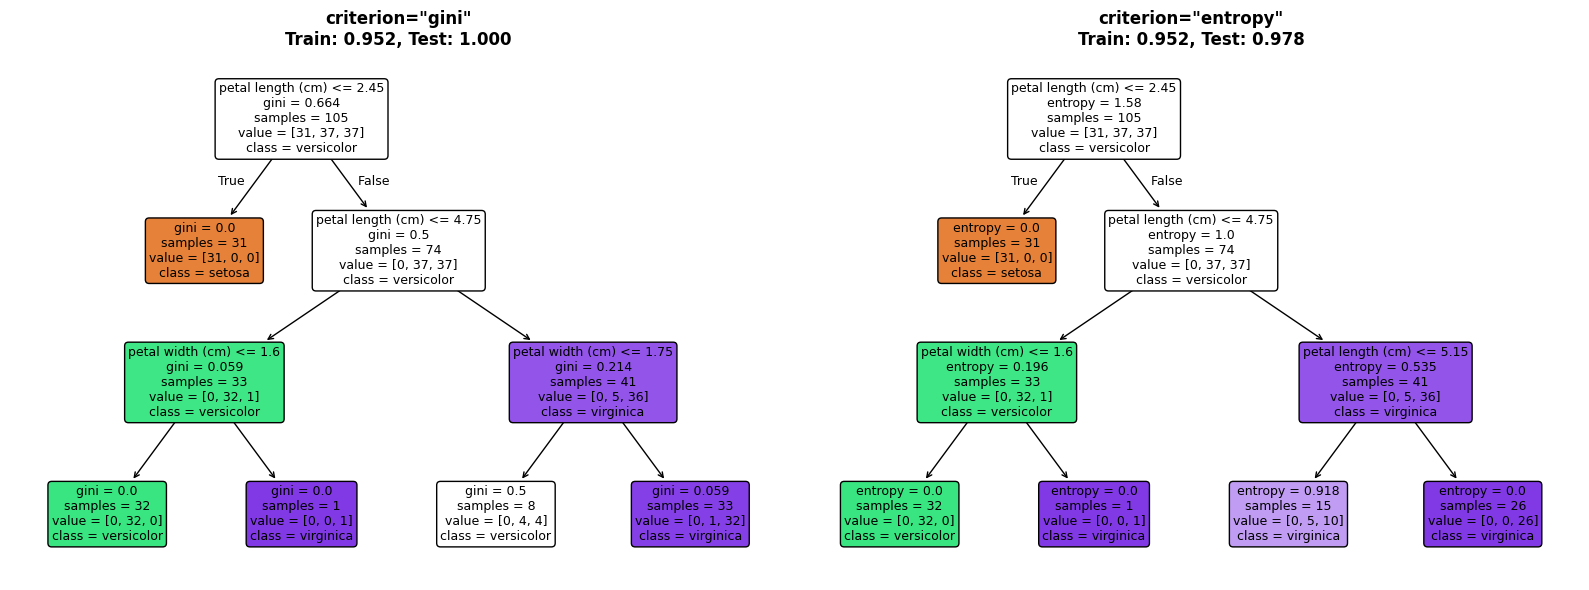


Comparison: Gini vs Entropy
--------------------------------------------------
Gini     - Train: 0.952, Test: 1.000
Entropy  - Train: 0.952, Test: 0.978

In practice, both criteria give similar results!


In [11]:
# Compare Gini vs Entropy
criteria = ['gini', 'entropy']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, criterion in enumerate(criteria):
    tree = DecisionTreeClassifier(max_depth=3, criterion=criterion, random_state=42)
    tree.fit(X_train, y_train)
    
    train_acc = tree.score(X_train, y_train)
    test_acc = tree.score(X_test, y_test)
    
    plot_tree(tree,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              filled=True,
              rounded=True,
              fontsize=9,
              ax=axes[idx])
    
    axes[idx].set_title(f'criterion="{criterion}"\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}',
                       fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nComparison: Gini vs Entropy")
print("-" * 50)
for criterion in criteria:
    tree = DecisionTreeClassifier(max_depth=3, criterion=criterion, random_state=42)
    tree.fit(X_train, y_train)
    print(f"{criterion.capitalize():8s} - Train: {tree.score(X_train, y_train):.3f}, "
          f"Test: {tree.score(X_test, y_test):.3f}")

print("\nIn practice, both criteria give similar results!")

## 5. Overfitting in Decision Trees

Decision trees are prone to overfitting. Let's see this in action.

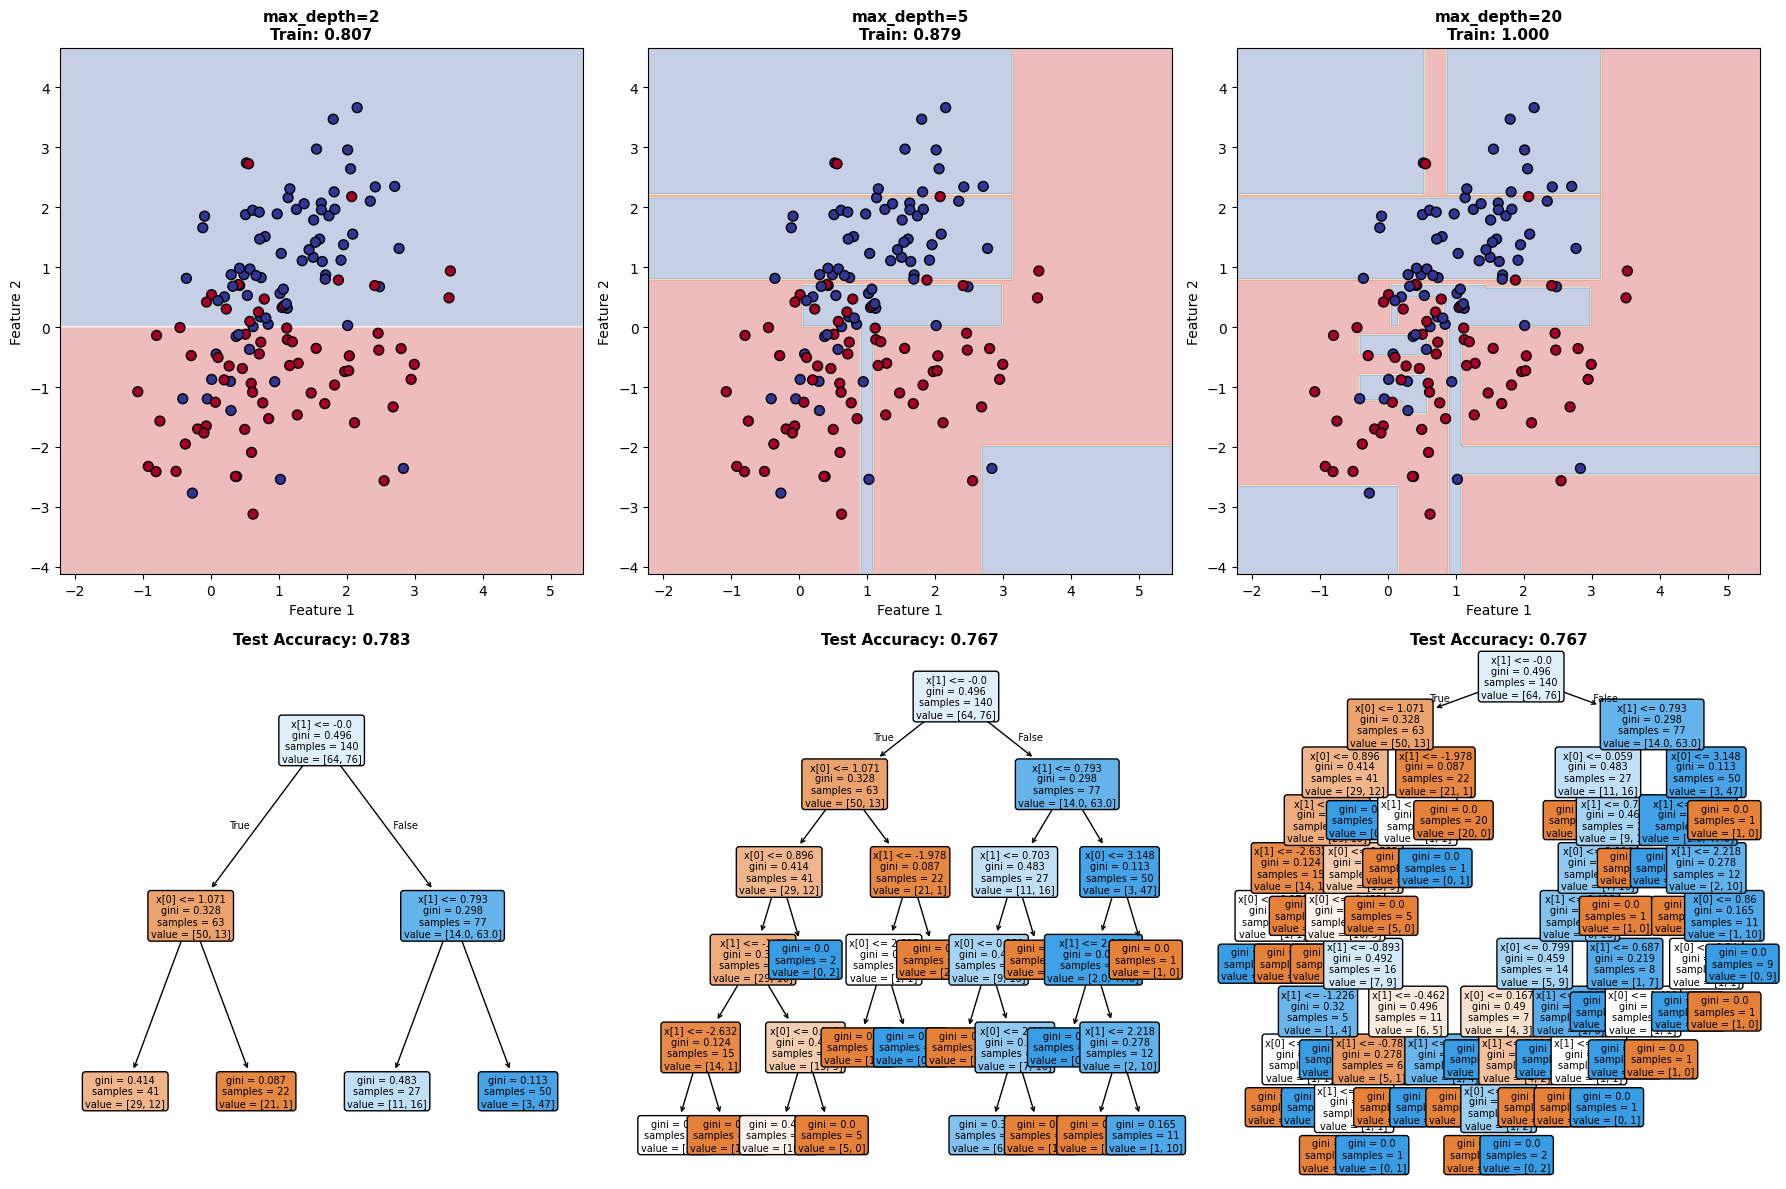


Observations:
- Shallow tree (depth=2): Simple boundary, underfitting
- Medium tree (depth=5): Reasonable boundary, good generalization
- Deep tree (depth=20): Complex boundary, overfitting to noise


In [12]:
# Create a noisy dataset to demonstrate overfitting
X_noisy, y_noisy = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.1,  # Add noise
    random_state=42
)

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
    X_noisy, y_noisy, test_size=0.3, random_state=42
)

# Train trees with different depths
depths = [2, 5, 20]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, depth in enumerate(depths):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_n, y_train_n)
    
    train_acc = tree.score(X_train_n, y_train_n)
    test_acc = tree.score(X_test_n, y_test_n)
    
    # Plot decision boundary
    ax = axes[0, idx]
    x_min, x_max = X_noisy[:, 0].min() - 1, X_noisy[:, 0].max() + 1
    y_min, y_max = X_noisy[:, 1].min() - 1, X_noisy[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.scatter(X_train_n[:, 0], X_train_n[:, 1], c=y_train_n, 
              cmap='RdYlBu', edgecolors='black', s=50)
    ax.set_title(f'max_depth={depth}\nTrain: {train_acc:.3f}', 
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    # Plot tree structure
    ax = axes[1, idx]
    plot_tree(tree, filled=True, rounded=True, fontsize=7, ax=ax)
    ax.set_title(f'Test Accuracy: {test_acc:.3f}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Shallow tree (depth=2): Simple boundary, underfitting")
print("- Medium tree (depth=5): Reasonable boundary, good generalization")
print("- Deep tree (depth=20): Complex boundary, overfitting to noise")

### Key Insight: Preventing Overfitting

**Strategies to prevent overfitting:**
1. **Limit tree depth** (max_depth)
2. **Require minimum samples** (min_samples_split, min_samples_leaf)
3. **Prune the tree** (post-pruning with ccp_alpha)
4. **Use cross-validation** to select hyperparameters
5. **Use ensemble methods** (Random Forests - next notebook!)

## 6. Practical Example: Complete Workflow

Step 1: Loading Iris Dataset
Dataset shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']

Step 2: Splitting Data
Training set: (105, 4)
Test set: (45, 4)

Step 3: Finding Best Hyperparameters
Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best CV score: 0.952

Step 4: Training Final Model

Step 5: Evaluation
Training accuracy: 0.981
Test accuracy: 0.978


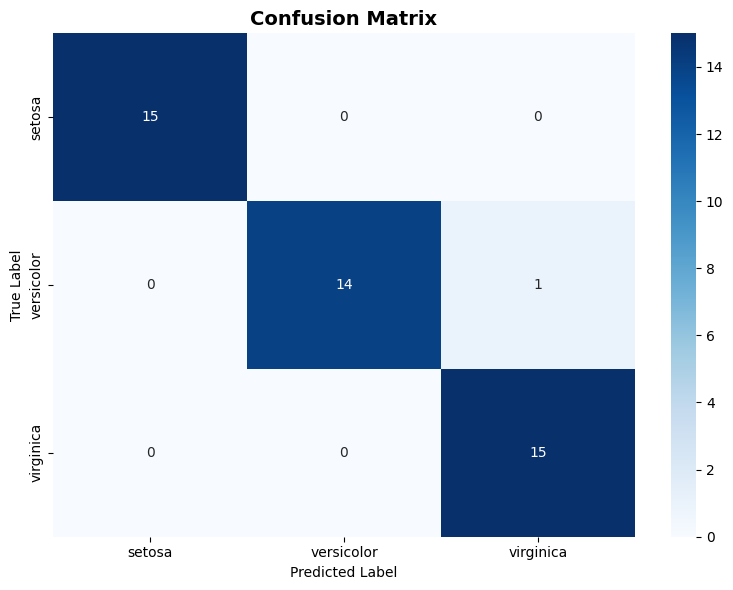


Complete!


In [13]:
# Step 1: Load and explore data
print("Step 1: Loading Iris Dataset")
print("="*50)
X, y = iris.data, iris.target
print(f"Dataset shape: {X.shape}")
print(f"Classes: {iris.target_names}")

# Step 2: Split data
print("\nStep 2: Splitting Data")
print("="*50)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Step 3: Try different hyperparameters with cross-validation
print("\nStep 3: Finding Best Hyperparameters")
print("="*50)

param_grid = {
    'max_depth': [2, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

best_score = 0
best_params = {}

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        tree = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            random_state=42
        )
        scores = cross_val_score(tree, X_train, y_train, cv=5)
        mean_score = scores.mean()
        
        if mean_score > best_score:
            best_score = mean_score
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split
            }

print(f"Best parameters: {best_params}")
print(f"Best CV score: {best_score:.3f}")

# Step 4: Train final model
print("\nStep 4: Training Final Model")
print("="*50)
final_tree = DecisionTreeClassifier(**best_params, random_state=42)
final_tree.fit(X_train, y_train)

# Step 5: Evaluate
print("\nStep 5: Evaluation")
print("="*50)
train_acc = final_tree.score(X_train, y_train)
test_acc = final_tree.score(X_test, y_test)

print(f"Training accuracy: {train_acc:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

# Confusion matrix
y_pred = final_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nComplete!")

## 7. Practice Exercises

Try these exercises to reinforce your understanding:

### Exercise 1: Gini vs Entropy

Calculate Gini index and Entropy for a node with:
- 20 samples of Class A
- 10 samples of Class B
- 5 samples of Class C

Which criterion says this node is more impure?

In [ ]:
# Your code here
class_counts = [20, 10, 5]

# Calculate Gini
gini = gini_index(class_counts)

# Calculate Entropy
ent = entropy(class_counts)

print(f"Gini index: {gini:.4f}")
print(f"Entropy: {ent:.4f}")

### Exercise 2: Find Optimal max_depth

Use cross-validation to find the optimal max_depth for the Iris dataset.
Try depths from 1 to 15.

In [ ]:
# Your code here
depth_range = range(1, 16)
cv_scores = []

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X, y, cv=5)
    cv_scores.append(scores.mean())

# Find best depth
best_depth = depth_range[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depth_range, cv_scores, 'o-', linewidth=2)
plt.axvline(best_depth, color='red', linestyle='--', 
           label=f'Best depth: {best_depth} (score: {best_score:.3f})')
plt.xlabel('max_depth')
plt.ylabel('Cross-validation Score')
plt.title('Finding Optimal max_depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Best max_depth: {best_depth}")
print(f"Best CV score: {best_score:.3f}")

### Exercise 3: Compare Multiple Configurations

Train 5 different decision trees with different hyperparameter combinations.
Which configuration gives the best test accuracy?

In [ ]:
# Your code here
configurations = [
    {'max_depth': 3, 'min_samples_split': 2, 'criterion': 'gini'},
    {'max_depth': 5, 'min_samples_split': 5, 'criterion': 'gini'},
    {'max_depth': 3, 'min_samples_split': 2, 'criterion': 'entropy'},
    {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'gini'},
    {'max_depth': None, 'min_samples_split': 20, 'criterion': 'entropy'},
]

results = []
for i, config in enumerate(configurations):
    tree = DecisionTreeClassifier(**config, random_state=42)
    tree.fit(X_train, y_train)
    
    train_acc = tree.score(X_train, y_train)
    test_acc = tree.score(X_test, y_test)
    
    results.append({
        'config': i+1,
        'train_acc': train_acc,
        'test_acc': test_acc,
        **config
    })

results_df = pd.DataFrame(results)
print("\nConfiguration Comparison:")
print(results_df.to_string(index=False))

best_config = results_df.loc[results_df['test_acc'].idxmax()]
print(f"\nBest configuration: Config {int(best_config['config'])}")
print(f"Test accuracy: {best_config['test_acc']:.3f}")

## Summary

### Key Takeaways:

1. **Decision trees** are intuitive, interpretable models that work like flowcharts

2. **Tree structure**:
   - Root: First question
   - Internal nodes: Decision points
   - Leaves: Final predictions

3. **Splitting criteria**:
   - Gini index: Fast, default in scikit-learn
   - Entropy: Information-theoretic
   - Both work well in practice

4. **Important hyperparameters**:
   - max_depth: Controls tree depth
   - min_samples_split: Minimum samples to split
   - min_samples_leaf: Minimum samples in leaf
   - criterion: 'gini' or 'entropy'

5. **Overfitting**:
   - Trees can easily overfit (memorize training data)
   - Use hyperparameters to control complexity
   - Use cross-validation for evaluation

### Quick Reference:

```python
from sklearn.tree import DecisionTreeClassifier

# Create and train tree
tree = DecisionTreeClassifier(
    max_depth=5,              # Limit depth
    min_samples_split=10,     # Min samples to split
    criterion='gini',         # Splitting criterion
    random_state=42           # Reproducibility
)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Visualize
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, rounded=True)
```

### Advantages of Decision Trees:
- Easy to understand and visualize
- No need for feature scaling
- Handle both numerical and categorical data
- Capture non-linear relationships

### Disadvantages:
- Prone to overfitting
- Can be unstable (small changes in data -> different tree)
- Not always the most accurate

### Next Steps:

In the next notebook, we'll learn about **Random Forests**, which combine many decision trees to create more powerful and stable models!